In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV as gridsearchcv
from sklearn.metrics import mean_squared_error, make_scorer, r2_score, auc, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier as dtc

from scipy import stats

import math
import os
import random

In [3]:
## Move to correct folder for server.  Can remove before sending
os.chdir('/home/poblivsig/Dropbox/horses2')
print(os.getcwd())

/home/poblivsig/Dropbox/horses2


In [4]:
## Open the pre-processed csv
df = pd.read_csv('data/winequality-red.csv')

(1599, 12)
(1599, 12)


In [79]:
## Get info about wine
print(f'Shape\n\n{df.shape}')
print(f'Columns\n\n{df.columns}')
print(f'dtypes\n\n{df.dtypes}')
pd.set_option('display.max_columns', None)
print(f'Description\n\n{df.describe()}')
print(f'Info:\n{df.info}')
print(f'Check out the sample: {df.sample(n=1)}')
pd.set_option('display.max_columns', 5)

Shape

(1599, 12)
Columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
Description

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0

/home/poblivsig/Dropbox/horses2/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

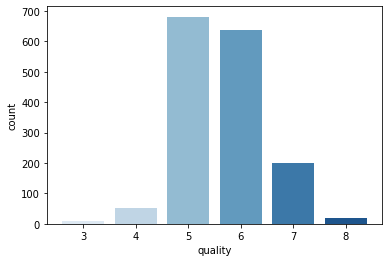

In [7]:
# Count the different quality values
sns.countplot(df['quality'],
              palette='Blues',
              label="Quality Count", )
plt.plot()
plt.savefig('data/charts/bc_diag_countplot.png')

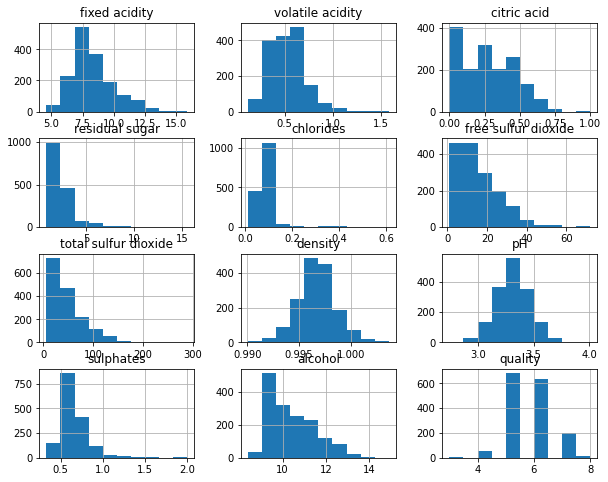

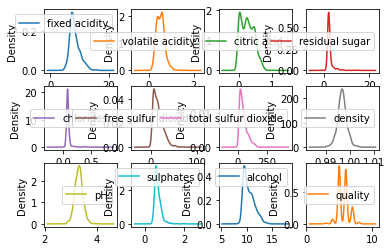

In [8]:
# Create mini-histograms for each attribute
df.hist(bins=10,
        figsize=(10, 8))
plt.show()

# Build density plots
# df.plot(kind='density',
#         subplots=True,
#         sharex=False,
#         layout=(3,4))
# plt.show()

In [9]:
# Try a scatterplot matrix from https://medium.com/analytics-vidhya/step-by-step-guide-for-predicting-wine-quality-using-scikit-learn-de5869f8f91a

[]

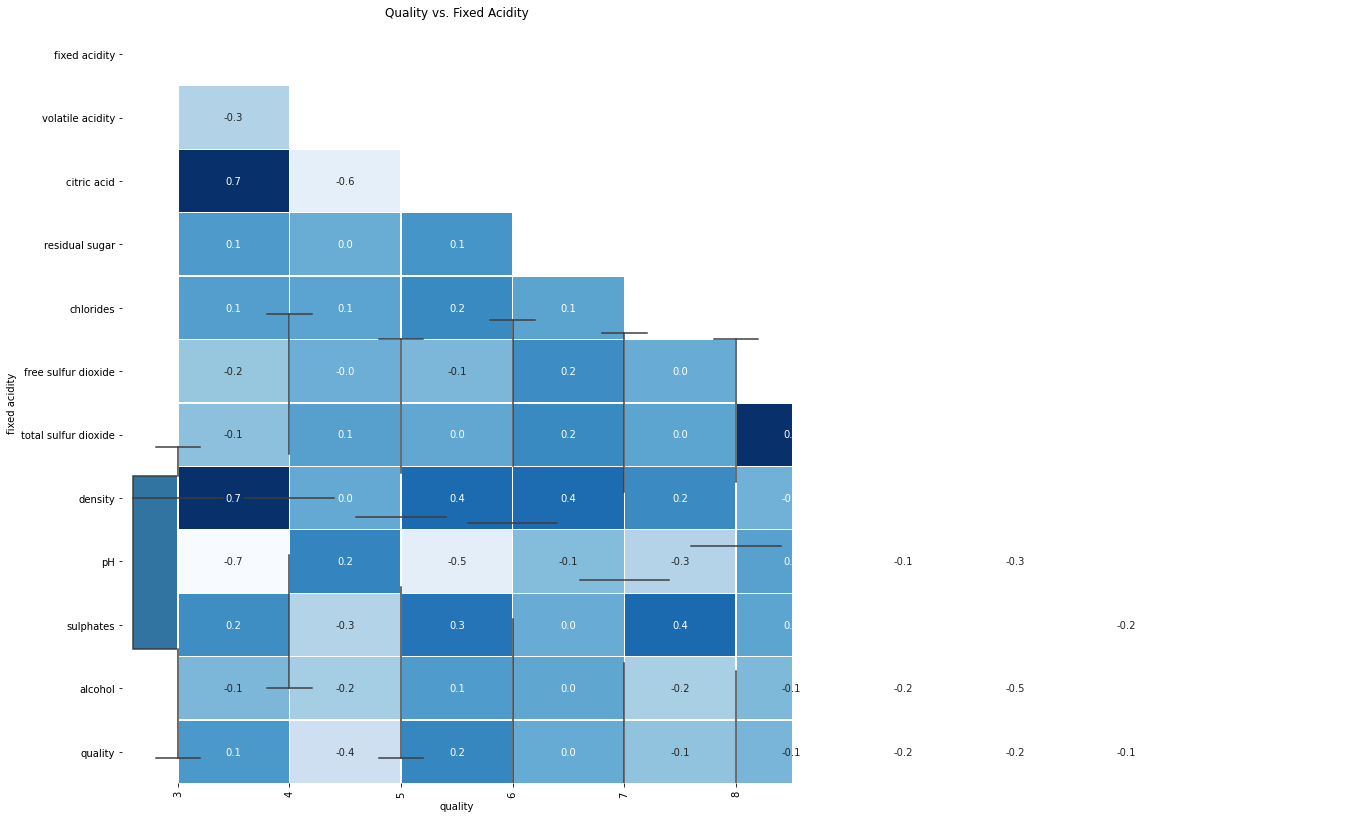

In [10]:
# Build a heatmap to find the attributes that correlate the most
# f,ax = plt.subplots(figsize=(12, 14))
# conf_matrix = np.triu(correlations)
# sns.heatmap(df.corr(),
#             annot=True,
#             cbar=0,
#             linewidths=.3,
#             fmt='.1f',
#             cmap='Blues',
#             ax=ax,
#             mask=conf_matrix)
# plt.plot()

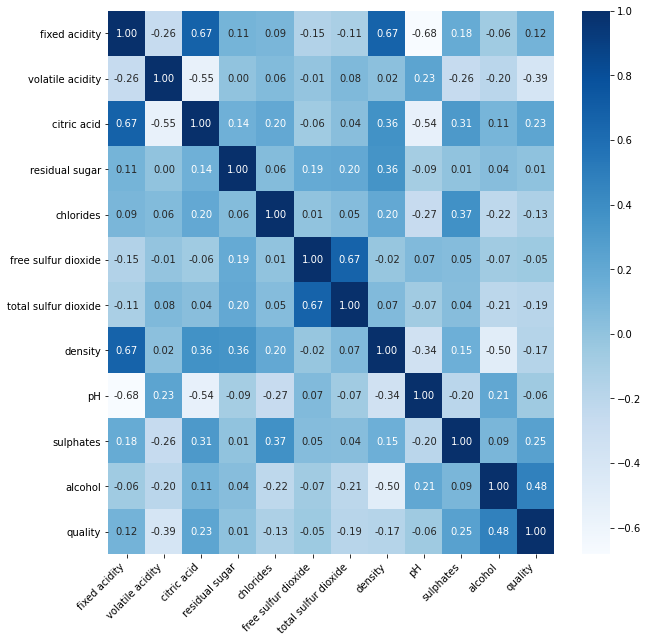

In [86]:
corrs = df.corr()
col_names = ['fixed acidity',
             'volatile acidity',
             'citric acid',
             'residual sugar',
             'chlorides',
             'free sulfur dioxide',
             'total sulfur dioxide',
             'density',
             'pH',
             'sulphates',
             'alcohol',
             'quality']
fig, ax = plt.subplots(figsize=(10, 10))

# Create color map
colormap = sns.diverging_palette(220,
                                 10,
                                 as_cmap=True)

# Create Heat Map, including annotations
# Put the floating point numbers in the map
sns.heatmap(corrs,
            cmap='Blues',
            fmt=".2f",
            annot=True)

ax.set_xticklabels(
    col_names,
    horizontalalignment='right',
    rotation=45)

ax.set_yticklabels(col_names)
plt.show()

In [88]:
# Find the amount of correlation between each column and the diagnosis
print('Amount of correlation (Pearsons r) for each column')
for (col_name, _) in df.iteritems():
    print(df[col_name].corr(df['quality']), method='pearson')

0.47616632400113584


[]

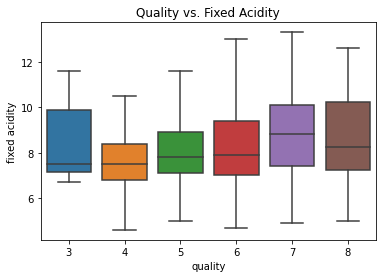

In [81]:
###############################
# Build boxplots for the most correlated against the different quality levels (3)

## Fixed acidity
plot = sns.boxplot(x='quality', y='fixed acidity', data=df, showfliers=False)
plot.set_title('Quality vs. Fixed Acidity')
plt.plot()

[]

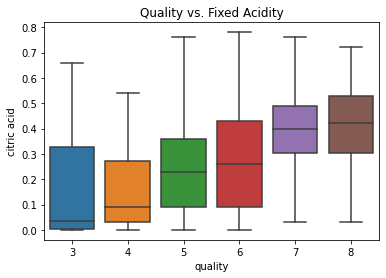

In [11]:
## Citric Acid
plot = sns.boxplot(x='quality', y='citric acid', data=df, showfliers=False)
plot.set_title('Quality vs. Fixed Acidity')
plt.plot()


[]

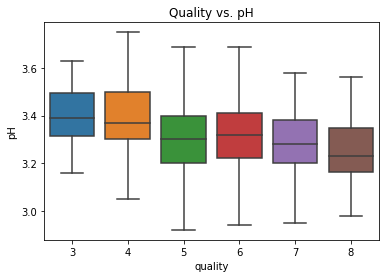

In [12]:
## pH
plot = sns.boxplot(x='quality', y='pH', data=df, showfliers=False)
plot.set_title('Quality vs. pH')
plt.plot()

[]

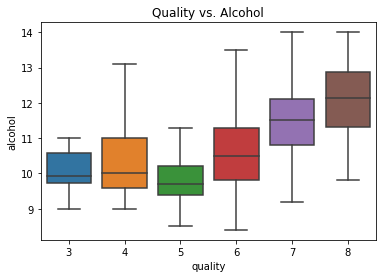

In [13]:
## Alcohol
plot = sns.boxplot(x='quality', y='alcohol', data=df, showfliers=False)
plot.set_title('Quality vs. Alcohol')
plt.plot()

[]

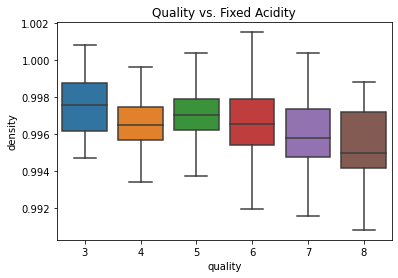

In [14]:
## Density
plot = sns.boxplot(x='quality', y='density', data=df, showfliers=False)
plot.set_title('Quality vs. Fixed Acidity')
plt.plot()



[]

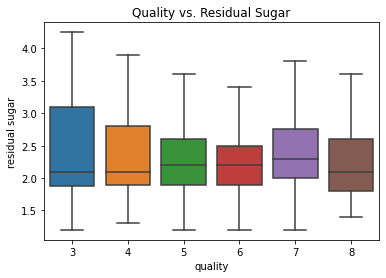

In [15]:
## Residual Sugar
plot = sns.boxplot(x='quality', y='residual sugar', data=df, showfliers=False)
plot.set_title('Quality vs. Residual Sugar')
plt.plot()

In [16]:
## Split the data up.
y = df['quality']
X = df.drop('quality', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, stratify=y, random_state = 17)
print(df.shape)

(1599, 12)


In [17]:
# Scale the features (attributes)
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [39]:
# Logistical Regression
lr = LogisticRegression(random_state = 0, max_iter=200)
lr.fit(x_train, y_train)

print(f'logistic regression training accuracy: {lr.score(x_train, y_train)}')

Logistic Regression training accuracy: 0.6110531803962461


In [18]:
# using decisiontreeclassifier
tree = dtc(criterion = 'gini', random_state = 0)
tree.fit(x_train, y_train)
print('[3]decision tree classifier training accuracy:', tree.score(x_train, y_train))

[3]Decision Tree Classifier Training Accuracy: 1.0


In [19]:
tree_predictions = tree.predict(x_test)
tree_accuracy = accuracy_score(y_test, tree_predictions)
print(f'tree accuracy = {tree_accuracy}')

Tree Accuracy = 0.5828125


In [51]:
# print(cross_val_score(decisiontreeclassifier(criterion = 'gini', random_state = 0), x_train, y_train, cv=5))

clf = gridsearchcv(dtc(), {
    'criterion':['gini', 'entropy'],
    'max_depth':[count for count in range(1, 30)]
}, cv=9,
   return_train_score=True,
   scoring=make_scorer(mean_squared_error))

clf.fit(X_train, y_train)
# print(clf.cv_results_)

### Output the results

# print("Decision Tree Grid Search Results:")
# dtc_df = pd.DataFrame(clf.cv_results_)
# pd.set_option('display.max_columns', None)
# print(dtc_df)
print(f'Best parameters: {clf.best_params_}')
print(f'Best score: {clf.best_score_}')
dtc_best_estimate = clf.best_estimator_
print(dtc_best_estimate)

## Now we have found the best parameters, use them...
dtc_best_estimate.fit(X_train,y_train)

dtc_predictor = dtc_best_estimate.predict(X_train)
mse = mean_squared_error(dtc_predictor, y_train)
r2 = r2_score(dtc_predictor, y_train)
print(f'Training Mean Square Error: {mse:.2f}')
print(f'Training R2: {r2:.2f}')

dtc_y_predictor = dtc_best_estimate.predict(X_test)
mse = mean_squared_error(y_test, dtc_y_predictor)
r2 = r2_score(y_test, dtc_y_predictor)
print(f'Testing Mean Square Error: {mse:.2f}')
print(f'Testing R2: {r2:.2f}')

/home/poblivsig/Dropbox/horses2/venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"


Best parameters: {'criterion': 'gini', 'max_depth': 24}
Best score: 0.7151981817825583
DecisionTreeClassifier(max_depth=24)
Training Mean Square Error: 0.00
Training R2: 1.00
Testing Mean Square Error: 0.72
Testing R2: -0.11



              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.10      0.10      0.10        21
           5       0.72      0.64      0.67       273
           6       0.57      0.63      0.60       255
           7       0.41      0.45      0.43        80
           8       0.20      0.14      0.17         7

    accuracy                           0.58       640
   macro avg       0.33      0.33      0.33       640
weighted avg       0.59      0.58      0.58       640



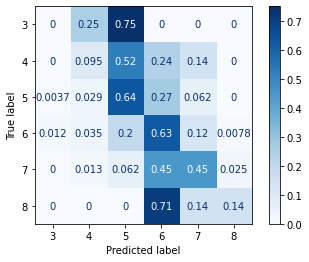

In [52]:
dtc_cm = confusion_matrix(y_test, dtc_y_predictor)
print()# Print a new line
plot_confusion_matrix(dtc_best_estimate,
                      X_test,
                      y_test,
                      cmap=plt.cm.Blues,
                      normalize='true' )

print(classification_report(y_test, dtc_y_predictor))

In [66]:
from sklearn import tree as tr
# Output diagram of the decision tree.
fig = plt.figure(figsize=(300, 240))
_ = tr.plot_tree(dtc_best_estimate,
                   filled=True)
fig.savefig("decision_tree.png")

/home/poblivsig/Dropbox/horses2/venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=8.
  warnings.warn(("The least populated class in y has only %d"


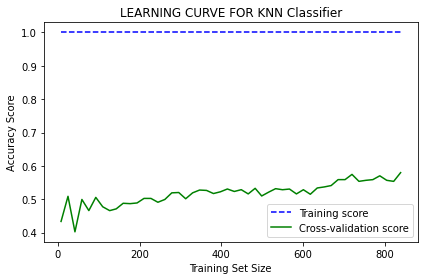

In [75]:
sizes, training_scores, testing_scores = learning_curve(dtc(),
                                                        X_train,
                                                        y_train,
                                                        cv=8,
                                                        scoring='accuracy',
                                                        train_sizes=np.linspace(0.01, 1.0, 50))
# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)

# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)

# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")

# Drawing plot
plt.title("LEARNING CURVE FOR KNN Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.savefig('dt_learning_curve.png')
plt.show()

In [78]:
from sklearn.metrics import precision_recall_curve
dtc_pred_prob = dtc_best_estimate.predict_proba(X_test)[:, 1]
precision, recall, threshold = precision_recall_curve(y_test, dtc_pred_prob)

# Plot the output.
plt.plot(threshold, precision[:-1], c ='r', label ='PRECISION')
plt.plot(threshold, recall[:-1], c ='b', label ='RECALL')
plt.grid()
plt.legend()
plt.title('Precision-Recall Curve')

ValueError: multiclass format is not supported

In [ ]:
# Using the Multi-Layer Perceptron
# Finds RND_COUNT_NUM random number of 1 layers count, RND_COUNT_NUM of 2, all the way to MAX_LAYERS
# MAX_LAYERSMAX_LAYERS = 5
# RND_COUNT_NUM = 100
# MAX_LAYER_SIZE = 30
#
# max_accuracy = 0
# best_layers = ()
# past_layers = []
#
# print('hey')
# for count in range(RND_COUNT_NUM):
#     layers = ()
#     for param_count in range (1, 5):
#         layers = tuple(random.randint(1, MAX_LAYER_SIZE) for _ in range(param_count))
#
#         if layers not in past_layers:
#             print(layers)
#             past_layers.append(layers)
#
#             if mlp_accuracy > max_accuracy:
#                 max_accuracy = mlp_accuracy
#                 best_layers = layers
mlp = MLPClassifier(max_iter=999, hidden_layer_sizes=layers)
mlp.fit(X_train, y_train)

## MLP matrix and classification report
mlp_predictions = mlp.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_predictions)

print(f'max_accuracy = {max_accuracy}')
print(f'best_layers = {best_layers}')

mlp_cm = confusion_matrix(y_test, mlp_predictions)

# TN = cm[0][0]
# TP = cm[1][1]
# FN = cm[1][0]
# FP = cm[0][1]

# print(cm)
# print('Model[{}] Testing Accuracy = "{}"'.format(tree, (TP + TN) / (TP + TN + FN + FP)))
print()# Print a new line
plot_confusion_matrix(mlp,
                      X_test,
                      y_test,
                      cmap=plt.cm.Blues,
                      normalize='true' )

print(classification_report(y_test, mlp_predictions))

In [31]:
# Use the following two to get all relevnant values:
# https://medium.com/analytics-vidhya/what-is-a-confusion-matrix-d1c0f8feda5
# https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

# For 3
# True +ve - They said it was the class and it was
print(type(cm))
TP = cm[0][0]
TN = cm[1:, 1:]
FP = cm[0][1:]
TN = cm[1:][0]
TP_sum = np.sum(cm[0][0])
TN_sum = np.sum(cm[1:][1:])
FP_sum = np.sum(cm[0][1:])
TN_sum = np.sum(cm[1:][0])
print(f'TP = \n{TP}')
print(f'TN = \n{TN}')
print(f'FP = \n{FP}')
print(f'FN = \n{FN}')

<class 'numpy.ndarray'>
TP = 
0
TN = 
[ 0  0 12  9  0  0]
FP = 
[0 4 0 0 0]
FN = 
0


In [ ]:
print(max_accuracy)